In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
os.chdir("/content/drive/MyDrive/5_AIADVANCE")
os.getcwd()

'/content/drive/MyDrive/5_AIADVANCE'

In [ ]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Load data từ file csv
data = pd.read_csv('data_logistic.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

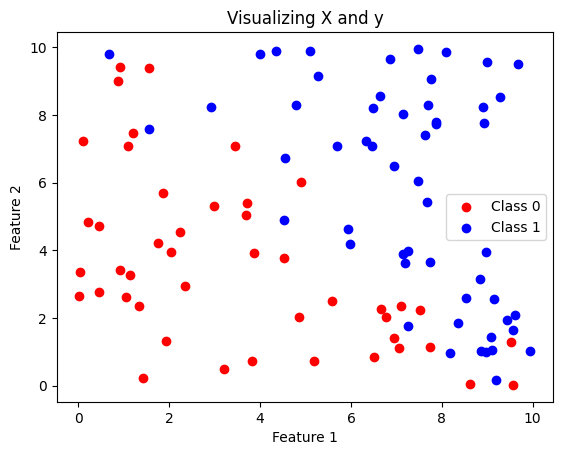

In [ ]:
import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [x[i] for i in range(len(x)) if y[i][0] == 0]
class_1 = [x[i] for i in range(len(x)) if y[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
plt.show()


In [ ]:
x_new = np.hstack((np.ones((N, 1)), x))
w_new = np.array([0.,0.1,0.1]).reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

# In ra số lượng mẫu trong từng tập
print("Số lượng mẫu trong tập train:", len(X_train))
print("Số lượng mẫu trong tập test:", len(X_test))

Số lượng mẫu trong tập train: 69
Số lượng mẫu trong tập test: 30


In [ ]:
print(X_train[0])

[1.         0.02227957 2.65842789]


In [ ]:
# Sử dụng logistic regression bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01
for i in range(1, numOfIteration):
    # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(X_train, w))
    cost[i] = -np.sum(np.multiply(y_train, np.log(y_predict)) + np.multiply(1-y_train, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(X_train.T, y_predict-y_train)
    print(cost[i])

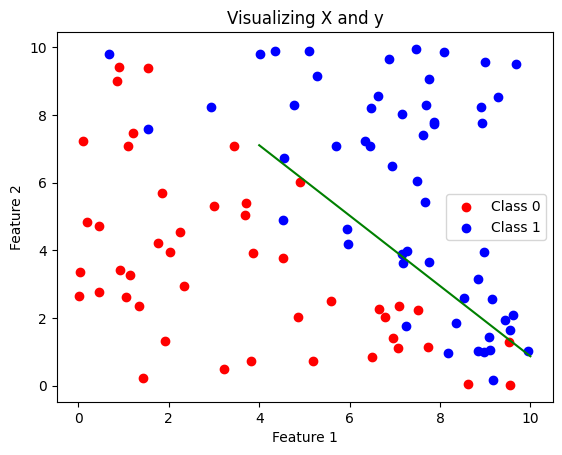

In [ ]:
# Vẽ đường phân cách.
import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [x[i] for i in range(len(x)) if y[i][0] == 0]
class_1 = [x[i] for i in range(len(x)) if y[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
# plt.show()

t = 0.5
plt.plot((4, 10), (-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

In [ ]:
# Lưu weight dùng numpy.save(), định dạng '.npy'
np.save('weight_logistic.npy', w)

# Load weight từ file '.npy'
w = np.load('weight_logistic.npy')

In [ ]:
print(w)

[[-25.4298099 ]
 [  3.44722426]
 [  2.58699477]]


In [ ]:
y_predict_test = sigmoid(np.dot(X_test, w))

In [ ]:
# print(y_predict_test)
y_result = [0 if i<0.5 else 1 for i in y_predict_test]
print(y_result)

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]


In [ ]:
print(y_test.reshape(1, -1)[0])

[1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0.]


In [ ]:
from sklearn.metrics import accuracy_score

# Tính độ chính xác
accuracy = accuracy_score(y_test.reshape(1, -1)[0], y_result)

print("Độ chính xác:", accuracy)

Độ chính xác: 0.7666666666666667


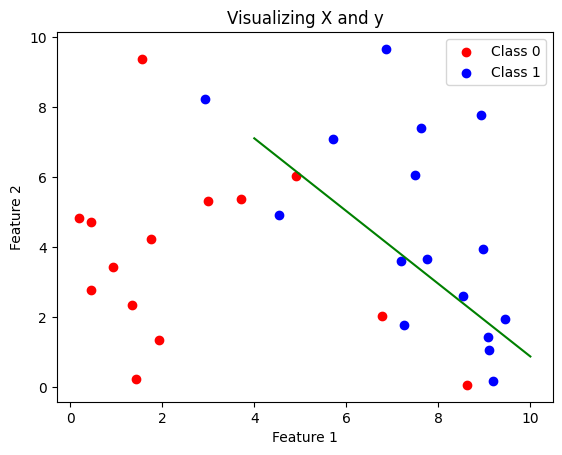

In [ ]:
# Vẽ đường phân cách.
import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [X_test[i][1:] for i in range(len(X_test)) if y_test[i][0] == 0]
class_1 = [X_test[i][1:] for i in range(len(X_test)) if y_test[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
# plt.show()

t = 0.5
plt.plot((4, 10), (-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()